In [94]:
# injecting error as a square curve
# two parameters to be experimented with, as errors

# Delta = width of the error (time, x-axis)
# delta = 200 datapoints

# H = hight of the error (amplitude, y-axis)
# a = 10 units

Workflow:

* generate error pattern with various Delta & H
* create array of errors
* import base dataset
* create a new dataset by injecting error into base dataset
* feed the new dataset into LSTM algorithm & 
* see the anomay detection response

### Generate error pattern

In [95]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

In [96]:
# https://github.com/biplabro/Anomaly-Detection-LSTM-AutoEncoder/blob/master/Error-Patterns/Square-wave.ipynb
# we need a total of 200 datapoints to represent 100 econds of timefeame, 
# datapoints at 0.5 seconds interval
# (sp + 198 middle points + ep) = 200

# starting point
sp = 0

# creating points in between
mp = np.zeros(199)

# amplitude A
a = 10

# add amplitude
mp = mp + a

In [97]:
# combine & create square wave
sqP = np.concatenate((sp,mp),axis=None)

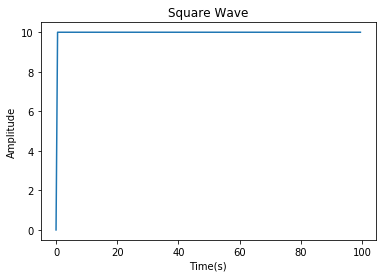

In [98]:
# Y-axis = sqP
# X-axis = time; 200 datapoints
time = np.arange(0,100,0.5)

# input parameters here
plt.plot(time,sqP) 
plt.title("Square Wave")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.show()

In [99]:
# creating the square wave in Negative Y axis
mp = np.zeros(199)

# amplitude of -10
mp = mp - a

#combine the array
sqN = np.concatenate((sp,mp),axis=None)

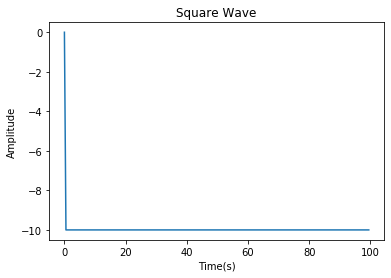

In [100]:
# Y-axis = sqN
# X-axis = time; 200 datapoints
time = np.arange(0,100,0.5)

# input parameters here
plt.plot(time,sqN) 
plt.title("Square Wave")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.show()

### Create array of errors

In [101]:
sqP

array([ 0., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10

In [102]:
sqN

array([  0., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
       -10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
       -10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
       -10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
       -10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
       -10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
       -10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
       -10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
       -10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
       -10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
       -10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
       -10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
       -10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
       -10., -10., -10., -10., -10., -10., -10., -1

### Import base dataset

In [103]:
# import libraries
import pandas as pd

# import dataset
df = pd.read_csv('normal_ev_8550_datapoints.csv')

# show stock table, check the value of row 7299, stator_winding.
#The value will be added as offset
df.head(7300)

,data_point,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,1,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,2,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,3,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,4,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,5,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7295,7296,87.134705,19.259142,72.121735,-96.513962,58.531780,4999.953613,-138.425613,53.453064,69.226501,42.747677,23.915983,48.668121,17
7296,7297,87.075249,19.173750,72.121735,-96.472054,58.558296,4999.952148,-138.527512,53.446396,69.253113,42.747066,23.820192,48.640553,17
7297,7298,87.158875,19.053833,72.121735,-96.504059,58.558323,4999.944824,-138.512543,53.459785,69.225822,42.747272,23.747124,48.617149,17
7298,7299,87.192833,18.931864,72.135780,-96.433640,58.513905,4999.946289,-138.473114,53.432575,69.196747,42.740173,23.679417,48.554394,17


### Inject sensor fault as active HIGH

In [104]:
# adding offset to sqP
sqP = sqP+df.iloc[7299]["stator_winding"]

In [105]:
# verify dataset
sqP

array([72.12200928, 82.12200928, 82.12200928, 82.12200928, 82.12200928,
       82.12200928, 82.12200928, 82.12200928, 82.12200928, 82.12200928,
       82.12200928, 82.12200928, 82.12200928, 82.12200928, 82.12200928,
       82.12200928, 82.12200928, 82.12200928, 82.12200928, 82.12200928,
       82.12200928, 82.12200928, 82.12200928, 82.12200928, 82.12200928,
       82.12200928, 82.12200928, 82.12200928, 82.12200928, 82.12200928,
       82.12200928, 82.12200928, 82.12200928, 82.12200928, 82.12200928,
       82.12200928, 82.12200928, 82.12200928, 82.12200928, 82.12200928,
       82.12200928, 82.12200928, 82.12200928, 82.12200928, 82.12200928,
       82.12200928, 82.12200928, 82.12200928, 82.12200928, 82.12200928,
       82.12200928, 82.12200928, 82.12200928, 82.12200928, 82.12200928,
       82.12200928, 82.12200928, 82.12200928, 82.12200928, 82.12200928,
       82.12200928, 82.12200928, 82.12200928, 82.12200928, 82.12200928,
       82.12200928, 82.12200928, 82.12200928, 82.12200928, 82.12

In [106]:
# insert errors at row = 7300 ; column = "stator_winding"
df.iloc[7300:7500]["stator_winding"]=sqP

/home/roy/anaconda3/envs/student/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [107]:
# inject fault as 120*C (active high), assuming sensor data to be either -20*C and +120*C
df.loc[7500:, ("stator_winding")] = -20

In [108]:
# verify the error injection
df.iloc[7299:7501]["stator_winding"]

7299    72.122009
7300    72.122009
7301    82.122009
7302    82.122009
7303    82.122009
          ...    
7496    82.122009
7497    82.122009
7498    82.122009
7499    82.122009
7500   -20.000000
Name: stator_winding, Length: 202, dtype: float64

In [109]:
# libraries required for visualizing data
import matplotlib.pyplot as plt
from plotly import graph_objs as go

In [110]:
### Visualize data
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['data_point'], y=df['stator_winding'], name='Temperature'))
fig.update_layout(showlegend=True, title='stator_winding Temp')
fig.show()

In [111]:
# adding offset to sqN
sqN = sqN+df.iloc[7299]["stator_winding"]

In [112]:
# insert errors at row = 8100 ; column = "stator_winding"
df.iloc[8100:8300]["stator_winding"]=sqN

/home/roy/anaconda3/envs/student/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [113]:
# verify the error injection
df.iloc[8099:8301]["stator_winding"]

8099   -20.000000
8100    72.122009
8101    62.122009
8102    62.122009
8103    62.122009
          ...    
8296    62.122009
8297    62.122009
8298    62.122009
8299    62.122009
8300   -20.000000
Name: stator_winding, Length: 202, dtype: float64

In [114]:
### Visualize data
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['data_point'], y=df['stator_winding'], name='Temperature'))
fig.update_layout(showlegend=True, title='stator_winding Temp')
fig.show()

In [115]:
# export the data into new file
df.to_csv('square_sensor_fault_high.csv')

### LSTM algo with 'square-error-ev.csv' dataset 

In [116]:
# import libraries
import os
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices' # for tensorflow
import tensorflow as tf
from datetime import datetime
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed

In [117]:
### read the data file
df = pd.read_csv('square_sensor_fault_high.csv')
### show stock table, default value top 6 rows, heading + 0-4 
df.head()

,Unnamed: 0,data_point,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,0,1,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,1,2,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,2,3,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,3,4,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,4,5,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


In [118]:
### Extract "Data" and "Stator winding" feature colums from the dataframe. 
df = df[['data_point', 'stator_winding']]

### show formatted table obtained in the previous step 
df.head()

,data_point,stator_winding
0,1,19.086670
1,2,19.092390
2,3,19.089380
3,4,19.083031
4,5,19.082525


In [119]:
### Concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8550 entries, 0 to 8549
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   data_point      8550 non-null   int64  
 1   stator_winding  8550 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 133.7 KB


In [120]:
### Visualize data
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['data_point'], y=df['stator_winding'], name='Temperature'))
fig.update_layout(showlegend=True, title='stator_winding Temp')
fig.show()

In [121]:
### train & test dataset split
train = df.loc[df['data_point'] <= 7000]
test = df.loc[df['data_point'] > 7000]
train.shape, test.shape #returns (rows, columns)

((7000, 2), (1550, 2))

In [122]:
### scale the data
scaler = StandardScaler()
scaler = scaler.fit(np.array(train['stator_winding']).reshape(-1,1))
train['stator_winding'] = scaler.transform(np.array(train['stator_winding']).reshape(-1,1))
test['stator_winding'] = scaler.transform(np.array(test['stator_winding']).reshape(-1,1))

/home/roy/anaconda3/envs/student/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/roy/anaconda3/envs/student/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



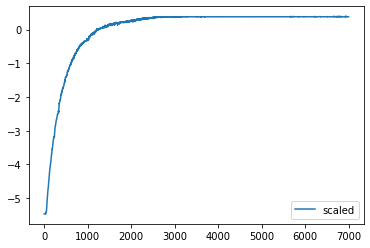

In [123]:
plt.plot(train['stator_winding'], label = 'scaled')
plt.legend()
plt.show()

In [124]:
### Create sequences
### Create sequences combining TIME_STEPS contiguous data values from the training data.
### TIME_STEP is set 60 as we want our network to have memory of 30 seconds. (2Hz)
TIME_STEPS=60

def create_sequences(X, y, time_steps=TIME_STEPS):
    X_out, y_out = [], []
    for i in range(len(X)-time_steps):
        X_out.append(X.iloc[i:(i+time_steps)].values)
        y_out.append(y.iloc[i+time_steps])
    
    return np.array(X_out), np.array(y_out)

In [125]:
#create sequence of 60 datapoints per batch
X_train, y_train = create_sequences(train[['stator_winding']], train['stator_winding'])
X_test, y_test = create_sequences(test[['stator_winding']], test['stator_winding'])

In [126]:
print("Training input shape: ", X_train.shape)
print("Testing input shape: ", X_test.shape)
# output format (number of sequence, length of batches, number of features)

Training input shape:  (6940, 60, 1)
Testing input shape:  (1490, 60, 1)


In [127]:
# set seed to regenerate same sequence of random numbers. 
np.random.seed(21)
tf.random.set_seed(21)

In [128]:
### building LSTM model
# sequential model
model = Sequential()
# It has 128 memory cells, activation function tanh
model.add(LSTM(128, activation = 'tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
# avoid overfitting
model.add(Dropout(rate=0.2))
# input * timesteps
model.add(RepeatVector(X_train.shape[1]))
# Decoder 
model.add(LSTM(128, activation = 'tanh', return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(X_train.shape[2])))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 60, 128)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 128)           131584    
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 128)           0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 60, 1)             129       
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
________________________________________________

In [57]:
### check execution time of cell, variable for different hardware & software setups
start_time = datetime.now()

### train LSTM model
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=60,
                    validation_split=0.1,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')],
                    shuffle=False)

end_time = datetime.now()
exec_time = end_time-start_time
print ("Execution time is: (H:MM:SS.ms)" )
print(exec_time)

Epoch 1/100
105/105 [==============================] - 16s 157ms/step - loss: 0.4176 - val_loss: 0.0031
Epoch 2/100
105/105 [==============================] - 15s 146ms/step - loss: 0.1982 - val_loss: 0.0024
Epoch 3/100
105/105 [==============================] - 15s 144ms/step - loss: 0.1178 - val_loss: 0.0021
Epoch 4/100
105/105 [==============================] - 15s 146ms/step - loss: 0.0748 - val_loss: 0.0019
Epoch 5/100
105/105 [==============================] - 16s 148ms/step - loss: 0.0190 - val_loss: 0.0019
Epoch 6/100
105/105 [==============================] - 16s 150ms/step - loss: 0.0241 - val_loss: 0.0019
Epoch 7/100
105/105 [==============================] - 15s 141ms/step - loss: 0.0937 - val_loss: 0.0014
Epoch 8/100
105/105 [==============================] - 16s 156ms/step - loss: 0.0645 - val_loss: 0.0014
Epoch 9/100
105/105 [==============================] - 17s 164ms/step - loss: 0.0153 - val_loss: 0.0015
Epoch 10/100
105/105 [==============================] - 17s 159m

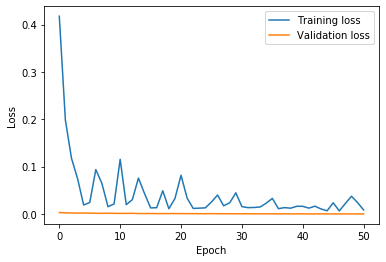

In [129]:
### Plot Training - Validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend();

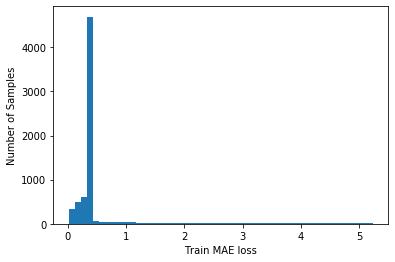

In [130]:
# Mean Absolute Error loss
X_train_pred = model.predict(X_train)
train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)
plt.hist(train_mae_loss, bins=50)
plt.xlabel('Train MAE loss')
plt.ylabel('Number of Samples');

In [131]:
# Set reconstruction error threshold
# threshold = np.max(train_mae_loss)
threshold = 0.1
print('Reconstruction error threshold:',threshold)

Reconstruction error threshold: 0.1


In [132]:
### check execution time of cell, variable for different hardware & software setups
start_time = datetime.now()

### Predict Anomalies on test data using threshold
X_test_pred = model.predict(X_test, verbose=1)
test_mae_loss = np.mean(np.abs(X_test_pred-X_test), axis=1)

end_time = datetime.now()
exec_time = end_time-start_time
print ("Execution time is: (H:MM:SS.ms)" )
print(exec_time)

47/47 [==============================] - 2s 33ms/step
Execution time is: (H:MM:SS.ms)
0:00:01.619032


Text(0, 0.5, 'Number of samples')

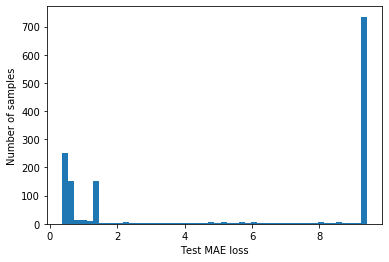

In [133]:
### munber of samples vs MAE loss
plt.hist(test_mae_loss, bins=50)
plt.xlabel('Test MAE loss')
plt.ylabel('Number of samples')

In [134]:
# create dataframe containing the following labels
anomaly_df = pd.DataFrame(test[TIME_STEPS:])
anomaly_df['loss'] = test_mae_loss
anomaly_df['threshold'] = threshold
anomaly_df['anomaly'] = anomaly_df['loss'] > anomaly_df['threshold']

In [135]:
# inspect dataset
anomaly_df.head()

,data_point,stator_winding,loss,threshold,anomaly
7060,7061,0.381658,0.370825,0.1,True
7061,7062,0.381654,0.370824,0.1,True
7062,7063,0.381652,0.370823,0.1,True
7063,7064,0.381650,0.370822,0.1,True
7064,7065,0.381649,0.370821,0.1,True


### Anomaly detection response

In [136]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=anomaly_df['data_point'], y=anomaly_df['loss'], name='Test loss'))
fig.add_trace(go.Scatter(x=anomaly_df['data_point'], y=anomaly_df['threshold'], name='Threshold'))
fig.update_layout(showlegend=True, title='Test loss vs. Threshold')
fig.show()

In [66]:
# check initial location of error
anomalies = anomaly_df.loc[anomaly_df['anomaly'] == True]
anomalies.head()

,data_point,stator_winding,loss,threshold,anomaly
7302,7303,1.484521,0.600433,0.1,True
7303,7304,1.484521,0.895567,0.1,True
7304,7305,1.484521,1.009024,0.1,True
7305,7306,1.484521,1.029736,0.1,True
7306,7307,1.484521,1.006593,0.1,True


### Data and Anomaly detection comparison

In [67]:
x = anomaly_df['data_point']
x

7060    7061
7061    7062
7062    7063
7063    7064
7064    7065
        ... 
8545    8546
8546    8547
8547    8548
8548    8549
8549    8550
Name: data_point, Length: 1490, dtype: int64

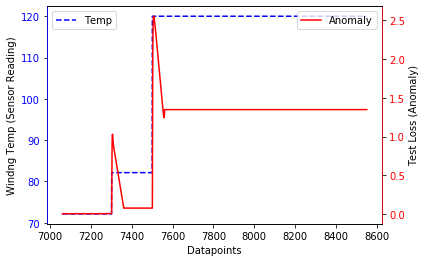

In [68]:
# create Subplots
fig,ax1=plt.subplots()
ax2 = ax1.twinx()
color1 = 'blue'
color2 = 'red'

### Plot data
line1 = ax1.plot(df.iloc[7060:]['data_point'], df.iloc[7060:]['stator_winding'], color = color1, linestyle = 'dashed', label = 'Temp')
ax1.set_ylabel('Windng Temp (Sensor Reading)')
ax1.set_xlabel('Datapoints')
ax1.tick_params(axis = 'y', labelcolor = color1)

### Plot anomaly
line2 = ax2.plot(anomaly_df['data_point'], anomaly_df['loss'], color = color2, label = 'Anomaly')
ax2.set_ylabel('Test Loss (Anomaly)')
ax2.tick_params(axis = 'y', labelcolor = color2)
ax2.spines['left'].set_color(color1)
ax2.spines['right'].set_color(color2)

# put legends for both Y axis
ax1.legend(loc = 2)
ax2.legend(loc = 1)

In [47]:
# References
# https://stackoverflow.com/questions/43772362/how-to-print-a-specific-row-of-a-pandas-dataframe
# https://github.com/biplabro/LSTM-time-series/blob/master/Error_patterns/Sine-wave.ipynb
# https://towardsdatascience.com/how-to-export-pandas-dataframe-to-csv-2038e43d9c03
# https://www.youtube.com/watch?v=_FO8jUMa65M
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
# https://www.youtube.com/watch?v=oS5PahnKf_E
# https://stackoverflow.com/questions/32565829/simple-way-to-measure-cell-execution-time-in-ipython-notebook
# https://ipython.readthedocs.io/en/stable/interactive/reference.html#magic-command-system
# https://www.youtube.com/watch?v=99gvqZ-xEgo
# https://pynative.com/python-get-execution-time-of-program/